## Importo las librerias a usar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance

### Cargo los datos y nuevas columnas

In [2]:
# Lee los datos
df = pd.read_excel("datos/deliveries_data.xlsx", index_col=0)
df_center = pd.read_excel("datos/centers_data.xlsx", index_col=0)


# Renombrar las columnas
df.rename(columns = {'x2 (ancho en cm)':'ancho', 'x3 (alto en cm)':'alto', 
                     'x1 (largo en cm)':'largo', 'weight (kg)':'peso'}, inplace = True)

# Creamos una columna que son las dimensiones en m3
df['dimensiones'] = df['largo']/100 * df['ancho']/100 * df['alto']/100 

### Dimension

<AxesSubplot:title={'center':'Distribución de las Dimensiones en m^3'}, xlabel='dimensiones', ylabel='Count'>

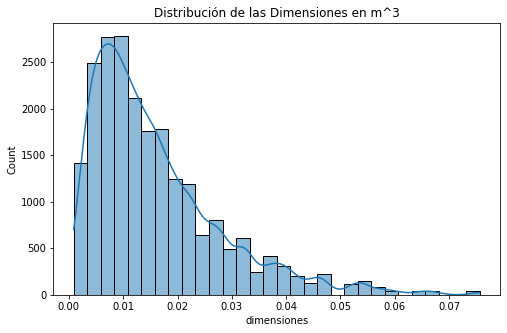

In [6]:
plt.figure(figsize = (8,5))
plt.title('Distribución de las Dimensiones en m^3')
sns.histplot(data=df['dimensiones'], bins = 30, kde=True)
# plt.show()

### Distribucion Peso

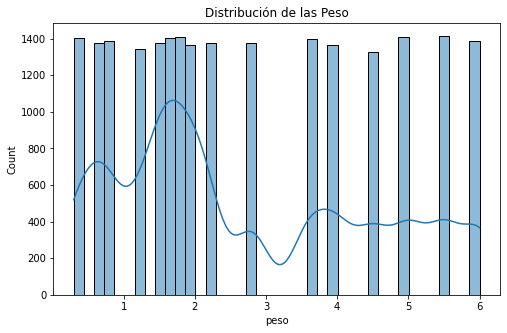

In [15]:
plt.figure(figsize = (8,5))
plt.title('Distribución de las Peso')
sns.histplot(data=df['peso'], bins = 40, kde=True)
# plt.show()

weigth = []
weigthAmount = []
value = []
for i in range(df['peso'].size):
    weigth.append(df['peso'].iat[i])

c = min(weigth)
while int(c) != int(max(weigth)):
    # weigthAmount.append([round(c, 1), weigth.count(round(c, 1))])
    weigthAmount.append(weigth.count(round(c, 1)))
    value.append(round(c, 1))
    c += 0.1
    
# plt.bar(value, weigthAmount) 

### Correlacion

Correlacion entre Peso y Dimensiones: -0.0017873143011292102


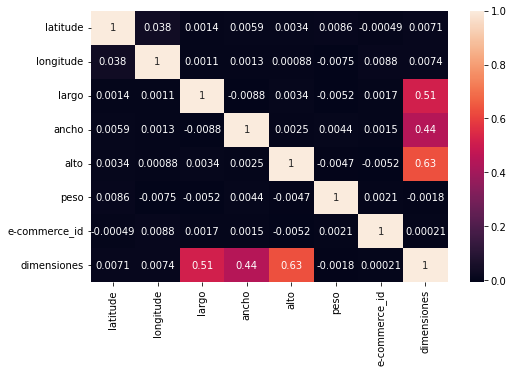

In [5]:
corr = df.corr().values
plt.figure(figsize = (8,5))
correlation_matrix = df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

print('Correlacion entre Peso y Dimensiones:', df['dimensiones'].corr(df['peso']))
# No hay correlacion entre peso y dimension

### Eccomerce


<AxesSubplot:title={'center':'Distribución de las Eccomerce'}, xlabel='e-commerce_id', ylabel='Count'>

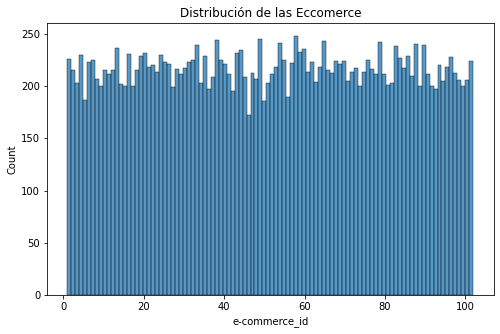

In [6]:
plt.figure(figsize = (8,5))
plt.title('Distribución de las Eccomerce')
sns.histplot(data=df['e-commerce_id'], bins = 102, kde=True)

### Fecha

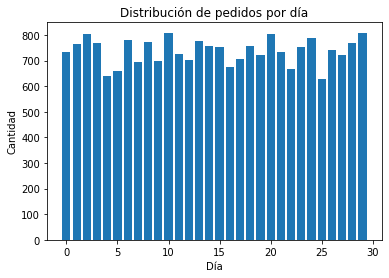

In [10]:

days = []
amountDays = []

for i in range(df['delivery_day'].size):
    days.append(df['delivery_day'].iat[i].day)

for i in range(30):
    value = days.count(i + 1)
    amountDays.append(value)


# plt.figure(figsize = (8,5))
# plt.title('Distribución de pedidos por dia')
# sns.histplot(data=amountDays, bins = 30)
# plt.show()

plt.bar(range(30), amountDays)
plt.title('Distribución de pedidos por día')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.show()

### Distancia entre Eccomerce y Bodega

C1: 41
C2: 8
C3: 3
C4: 50


<BarContainer object of 4 artists>

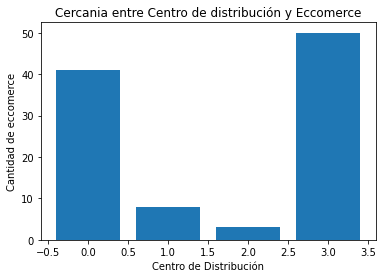

In [13]:
df_center = pd.read_excel("datos/centers_data.xlsx", index_col=0)
df_eccomerce = pd.read_excel("datos/e-commerce_data.xlsx", index_col=0)


c1 = 0
c2 = 0
c3 = 0
c4 = 0

for i in range(df_eccomerce['latitude'].size):
    coord_eccomerce = (df_eccomerce['latitude'].iat[i], df_eccomerce['longitude'].iat[i])
    distance = 10000000000000
    value = -1
    for j in range(df_center['latitude'].size):
        coord_center = (df_center['latitude'].iat[j], df_center['longitude'].iat[j])
        if distance > (geopy.distance.geodesic(coord_eccomerce, coord_center).km):
            distance = (geopy.distance.geodesic(coord_eccomerce, coord_center).km)
            value = j
    if value == 0:
        c1 += 1
    elif value == 1:
        c2 += 1
    elif value == 2:
        c3 += 1
    elif value == 3:
        c4 += 1

print('C1:', c1)
print('C2:', c2)
print('C3:', c3)
print('C4:', c4)
plt.title('Cercania entre Centro de distribución y Eccomerce')
plt.xlabel('Centro de Distribución')
plt.ylabel('Cantidad de eccomerce')
plt.bar(range(4), [c1, c2, c3, c4])



In [7]:
coordinate_center = []

for i in range(df_center['latitude'].size):
    coordinate_center.append([df_center['latitude'].iat[i], df_center['longitude'].iat[i]])

print('Entre centro 1 y 2:', geopy.distance.geodesic(coordinate_center[0], coordinate_center[1]).km)
print('Entre centro 1 y 3:', geopy.distance.geodesic(coordinate_center[0], coordinate_center[2]).km)
print('Entre centro 1 y 4:', geopy.distance.geodesic(coordinate_center[0], coordinate_center[3]).km)
print('Entre centro 2 y 3:', geopy.distance.geodesic(coordinate_center[1], coordinate_center[2]).km)
print('Entre centro 2 y 4:', geopy.distance.geodesic(coordinate_center[1], coordinate_center[3]).km)
print('Entre centro 3 y 4:', geopy.distance.geodesic(coordinate_center[2], coordinate_center[3]).km)

Entre centro 1 y 2: 6.952572005376177
Entre centro 1 y 3: 14.119928098234292
Entre centro 1 y 4: 7.906255080901067
Entre centro 2 y 3: 11.331026988709068
Entre centro 2 y 4: 5.000067878927088
Entre centro 3 y 4: 16.33083661747326


### Distancia Bodega con lugar Despacho

C1: 8272
C2: 2182
C3: 1670
C4: 9988


<BarContainer object of 4 artists>

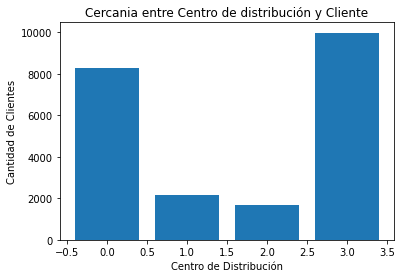

In [15]:

df_center = pd.read_excel("datos/centers_data.xlsx", index_col=0)
df = pd.read_excel("datos/deliveries_data.xlsx", index_col=0)


c1 = 0
c2 = 0
c3 = 0
c4 = 0

for i in range(df['latitude'].size):
    coord_delivery = (df['latitude'].iat[i], df['longitude'].iat[i])
    distance = 10000000000000
    value = -1
    for j in range(df_center['latitude'].size):
        coord_center = (df_center['latitude'].iat[j], df_center['longitude'].iat[j])
        if distance > (geopy.distance.geodesic(coord_delivery, coord_center).km):
            distance = (geopy.distance.geodesic(coord_delivery, coord_center).km)
            value = j
    if value == 0:
        c1 += 1
    elif value == 1:
        c2 += 1
    elif value == 2:
        c3 += 1
    elif value == 3:
        c4 += 1

print('C1:', c1)
print('C2:', c2)
print('C3:', c3)
print('C4:', c4)
plt.title('Cercania entre Centro de distribución y Cliente')
plt.xlabel('Centro de Distribución')
plt.ylabel('Cantidad de Clientes')
plt.bar(range(4), [c1, c2, c3, c4])
